In [1]:
from random import randint
import numpy as np 
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

In [2]:
for dirname, _, filenames in os.walk(r"C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\test\COVID19\COVID19(460).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\test\COVID19\COVID19(461).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\test\COVID19\COVID19(462).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\test\COVID19\COVID19(463).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\test\COVID19\COVID19(464).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\test\COVID19\COVID19(465).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\test\COVID19\COVID19(466).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\test\COVID19\COVID19(467).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\test\COVID19\COVID19(468).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibiti

C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\NORMAL\NORMAL(0).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\NORMAL\NORMAL(1).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\NORMAL\NORMAL(10).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\NORMAL\NORMAL(100).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\NORMAL\NORMAL(1000).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\NORMAL\NORMAL(1001).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\NORMAL\NORMAL(1002).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\NORMAL\NORMAL(1003).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\NORMAL\NORMAL(1004).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Person

C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\PNEUMONIA\PNEUMONIA(0).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\PNEUMONIA\PNEUMONIA(1).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\PNEUMONIA\PNEUMONIA(10).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\PNEUMONIA\PNEUMONIA(100).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\PNEUMONIA\PNEUMONIA(1000).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\PNEUMONIA\PNEUMONIA(1001).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\PNEUMONIA\PNEUMONIA(1002).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\PNEUMONIA\PNEUMONIA(1003).jpg
C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset\train\PNEUMONIA\PNEUMONIA(1004).jpg
C:\Users\N

In [3]:
data_dir =r"C:\Users\Nitish\Desktop\VIT\Semester 3\Project Exhibition\Personal\Dataset"
os.listdir(data_dir)

['test', 'train']

In [4]:
train_dir = data_dir+"/train"
os.listdir(train_dir)

['COVID19', 'NORMAL', 'PNEUMONIA']

In [5]:
test_dir = data_dir+"/test"
os.listdir(test_dir)

['COVID19', 'NORMAL', 'PNEUMONIA']

In [6]:
print('Train Covid:', len(os.listdir(train_dir+"/COVID19")))
print('Train Normal:', len(os.listdir(train_dir+"/NORMAL")))
print('Train Pneumonia:', len(os.listdir(train_dir+"/PNEUMONIA")))
print('Test Covid:', len(os.listdir(test_dir+"/COVID19")))
print('Test Normal:', len(os.listdir(test_dir+"/NORMAL")))
print('Test Pneumonia:', len(os.listdir(test_dir+"/PNEUMONIA")))


Train Covid: 460
Train Normal: 1266
Train Pneumonia: 3418
Test Covid: 116
Test Normal: 317
Test Pneumonia: 855


## Observing a sample image of each X-ray class


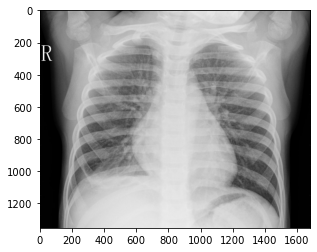

In [7]:
pneumonia_sample = imread(train_dir+"/PNEUMONIA"+"/PNEUMONIA(3188).jpg")
plt.imshow(pneumonia_sample)


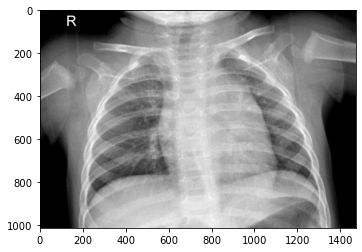

In [8]:
normal_sample = imread(train_dir+"/NORMAL"+"/NORMAL(342).jpg")
plt.imshow(normal_sample)


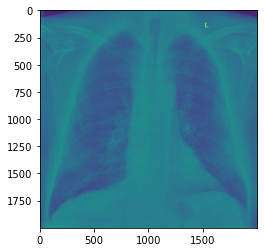

In [9]:
covid_sample = imread(train_dir+"/COVID19"+"/COVID19(189).jpg")
plt.imshow(covid_sample)


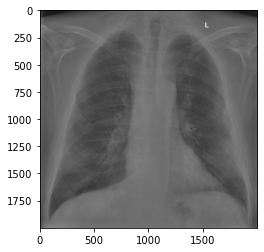

In [10]:
covid_sample = imread(train_dir+"/COVID19"+"/COVID19(189).jpg")
plt.imshow(covid_sample, cmap= "gray")


## Image generator


In [11]:
image_size = (400,400,3)

generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,)

## Training generator

In [12]:
train_generator = generator.flow_from_directory (
    train_dir,
    target_size=image_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

Found 5144 images belonging to 3 classes.


## Testing generator

In [13]:
test_generator = generator.flow_from_directory (
    test_dir,
    target_size=image_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 1288 images belonging to 3 classes.


In [14]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)


## Creating Model

In [15]:
model = Sequential()

model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = image_size))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = image_size))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape =image_size))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 132, activation = "relu"))

model.add(Dense(units = 60, activation = "relu"))

model.add(Dense(units = 3, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

## Fit model

In [16]:
history = model.fit_generator(train_generator, validation_data = test_generator, epochs = 10, callbacks=[stop])

C:\Users\Nitish\AppData\Local\Temp/ipykernel_17532/3851516316.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = test_generator, epochs = 10, callbacks=[stop])


Epoch 1/10
161/161 [==============================] - 236s 1s/step - loss: 0.5794 - accuracy: 0.7586 - val_loss: 0.3544 - val_accuracy: 0.8789
Epoch 2/10
161/161 [==============================] - 228s 1s/step - loss: 0.3608 - accuracy: 0.8534 - val_loss: 0.3230 - val_accuracy: 0.8859
Epoch 3/10
161/161 [==============================] - 224s 1s/step - loss: 0.3066 - accuracy: 0.8857 - val_loss: 0.2976 - val_accuracy: 0.8944
Epoch 4/10
161/161 [==============================] - 225s 1s/step - loss: 0.2766 - accuracy: 0.8906 - val_loss: 0.2814 - val_accuracy: 0.8975
Epoch 5/10
161/161 [==============================] - 224s 1s/step - loss: 0.2723 - accuracy: 0.9007 - val_loss: 0.2766 - val_accuracy: 0.9045
Epoch 6/10
161/161 [==============================] - 226s 1s/step - loss: 0.2529 - accuracy: 0.9044 - val_loss: 0.2267 - val_accuracy: 0.9231
Epoch 7/10
161/161 [==============================] - 224s 1s/step - loss: 0.2587 - accuracy: 0.9042 - val_loss: 0.2232 - val_accuracy: 0.9200

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

## Visualize Training


<AxesSubplot:>

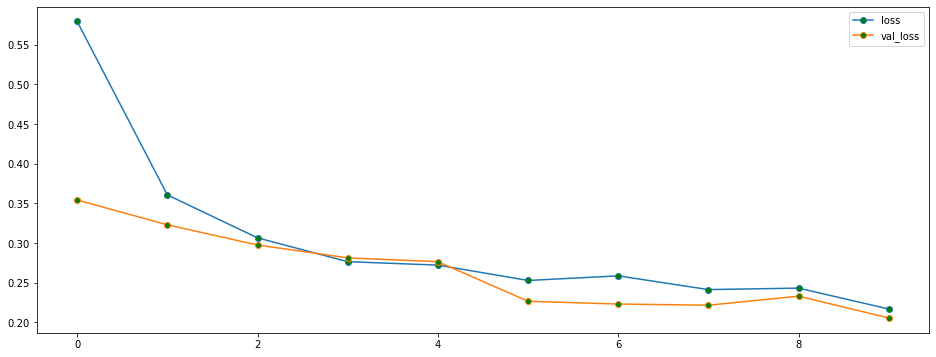

In [18]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot(figsize =(16,6), marker = "o", mfc = "g")

<AxesSubplot:>

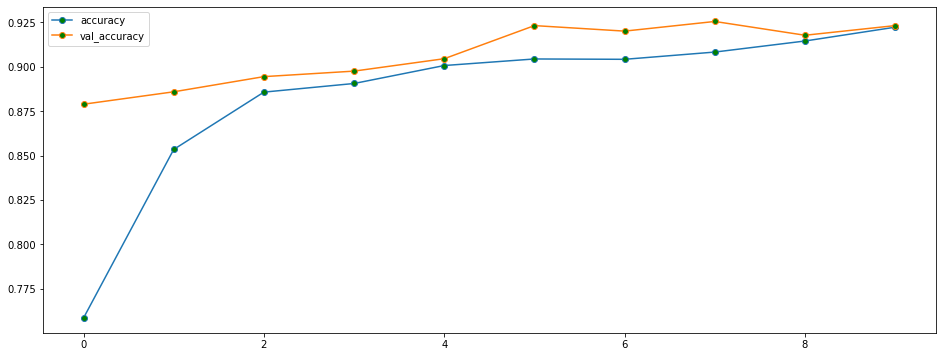

In [19]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot(figsize =(16,6), marker = "o", mfc = "g")

## predict

In [20]:
predictions = model.predict(test_generator)
predictions



41/41 [==============================] - 40s 961ms/step


array([[7.9680604e-01, 1.6469190e-01, 3.8502105e-02],
       [7.5905609e-01, 5.3638626e-02, 1.8730533e-01],
       [9.1953892e-01, 3.3857201e-03, 7.7075303e-02],
       ...,
       [3.6630201e-05, 5.5185352e-02, 9.4477797e-01],
       [2.9506016e-04, 1.3625325e-02, 9.8607963e-01],
       [3.4365471e-06, 3.0522728e-03, 9.9694425e-01]], dtype=float32)